<a href="https://colab.research.google.com/github/Seenuprime/Data-Analytics/blob/main/Huge_movies_DataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np

In [69]:
!kaggle datasets download -d alanvourch/tmdb-movies-daily-updates

Dataset URL: https://www.kaggle.com/datasets/alanvourch/tmdb-movies-daily-updates
License(s): Apache 2.0
tmdb-movies-daily-updates.zip: Skipping, found more recently modified local copy (use --force to force download)


In [70]:
import zipfile

zip_dir = zipfile.ZipFile('/content/tmdb-movies-daily-updates.zip')
zip_dir.extractall()
zip_dir.close()

In [71]:
df = pd.read_csv(r'/content/TMDB_all_movies.csv')
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes
0,2,Ariel,7.1,326.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,Finland,suomi,"Esko Salminen, Esko Nikkari, Turo Pajala, Matt...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN,7.4,8556.0
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,Finland,"suomi, English, svenska","Esko Nikkari, Matti Pellonpää, Malla Hukkanen,...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN,7.5,7297.0
2,5,Four Rooms,5.8,2578.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,United States of America,English,"Kimberly Blair, Sammi Davis, Paul Skemp, Bruce...","Alexandre Rockwell, Quentin Tarantino, Allison...","Andrzej Sekula, Rodrigo García, Guillermo Nava...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Lawrence Bender, Quentin T...",Combustible Edison,6.7,111724.0
3,6,Judgment Night,6.5,326.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,United States of America,English,"Doug Wert, Michael DeLorenzo, Everlast, Christ...",Stephen Hopkins,Peter Levy,"Jere Cunningham, Lewis Colick","Marilyn Vance, Gene Levy, Lloyd Segan",Alan Silvestri,6.6,19035.0
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,Austria,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN,8.1,282.0


In [72]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'director_of_photography', 'writers', 'producers',
       'music_composer', 'imdb_rating', 'imdb_votes'],
      dtype='object')

In [73]:
df.isna().sum()

,0
id,0
title,8
vote_average,2
vote_count,2
status,2
release_date,95207
revenue,2
runtime,2
budget,2
imdb_id,390517


In [74]:
df.dropna(subset=['title'], inplace=True)

In [75]:
df.isna().sum()

,0
id,0
title,0
vote_average,0
vote_count,0
status,0
release_date,95202
revenue,0
runtime,0
budget,0
imdb_id,390509


In [76]:
revenue_title = df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
revenue_title

,title,revenue
916188,TikTok Rizz Party,3.000000e+09
12058,Avatar,2.923706e+09
183547,Avengers: Endgame,2.799439e+09
53918,Avatar: The Way of Water,2.320250e+09
471,Titanic,2.264162e+09
89041,Star Wars: The Force Awakens,2.068224e+09
183549,Avengers: Infinity War,2.052415e+09
448037,Spider-Man: No Way Home,1.921847e+09
86544,Jurassic World,1.671537e+09
283049,The Lion King,1.663000e+09


Text(0.5, 1.0, 'Revenue over Title')

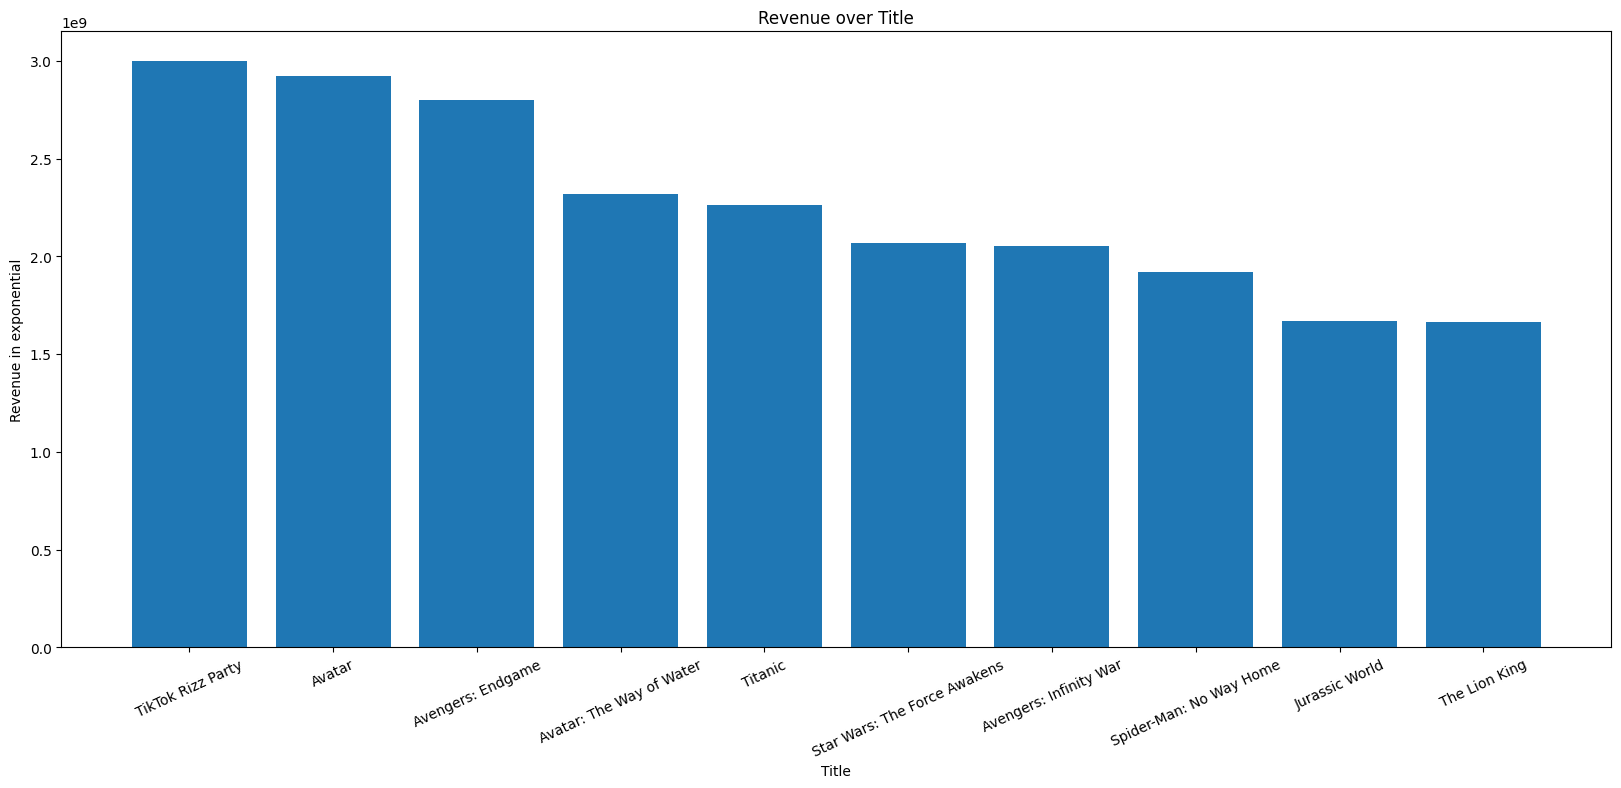

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.bar(revenue_title.title, revenue_title.revenue)
plt.xticks(rotation=25)
plt.xlabel('Title')
plt.ylabel('Revenue in exponential')
plt.title('Revenue over Title')

In [78]:
budget_title = df[['title', 'budget', 'revenue']].sort_values(by='budget', ascending=False).head(10)
budget_title

,title,budget,revenue
726372,Крик 4,645654654.0,5.465468e+08
261168,Avatar 5,600000000.0,0.000000e+00
125558,Avatar 4,500000000.0,0.000000e+00
53918,Avatar: The Way of Water,460000000.0,2.320250e+09
59423,Avatar 3,400000000.0,0.000000e+00
1238,Pirates of the Caribbean: On Stranger Tides,379000000.0,1.045700e+09
68078,Avengers: Age of Ultron,365000000.0,1.405404e+09
183547,Avengers: Endgame,356000000.0,2.799439e+09
254914,Fast X,340000000.0,7.047097e+08
391417,Gladiator II,310000000.0,0.000000e+00


In [79]:
df[df['title'].isin(['Avatar 5', 'Avatar 4', 'Avatar 3'])].index

Index([59423, 125558, 261168], dtype='int64')

In [80]:
filt = df[df['title'].isin(['Avatar 5', 'Avatar 4', 'Avatar 3'])].index
df.drop(filt, inplace=True)

Text(0.5, 1.0, 'Budget over Title')

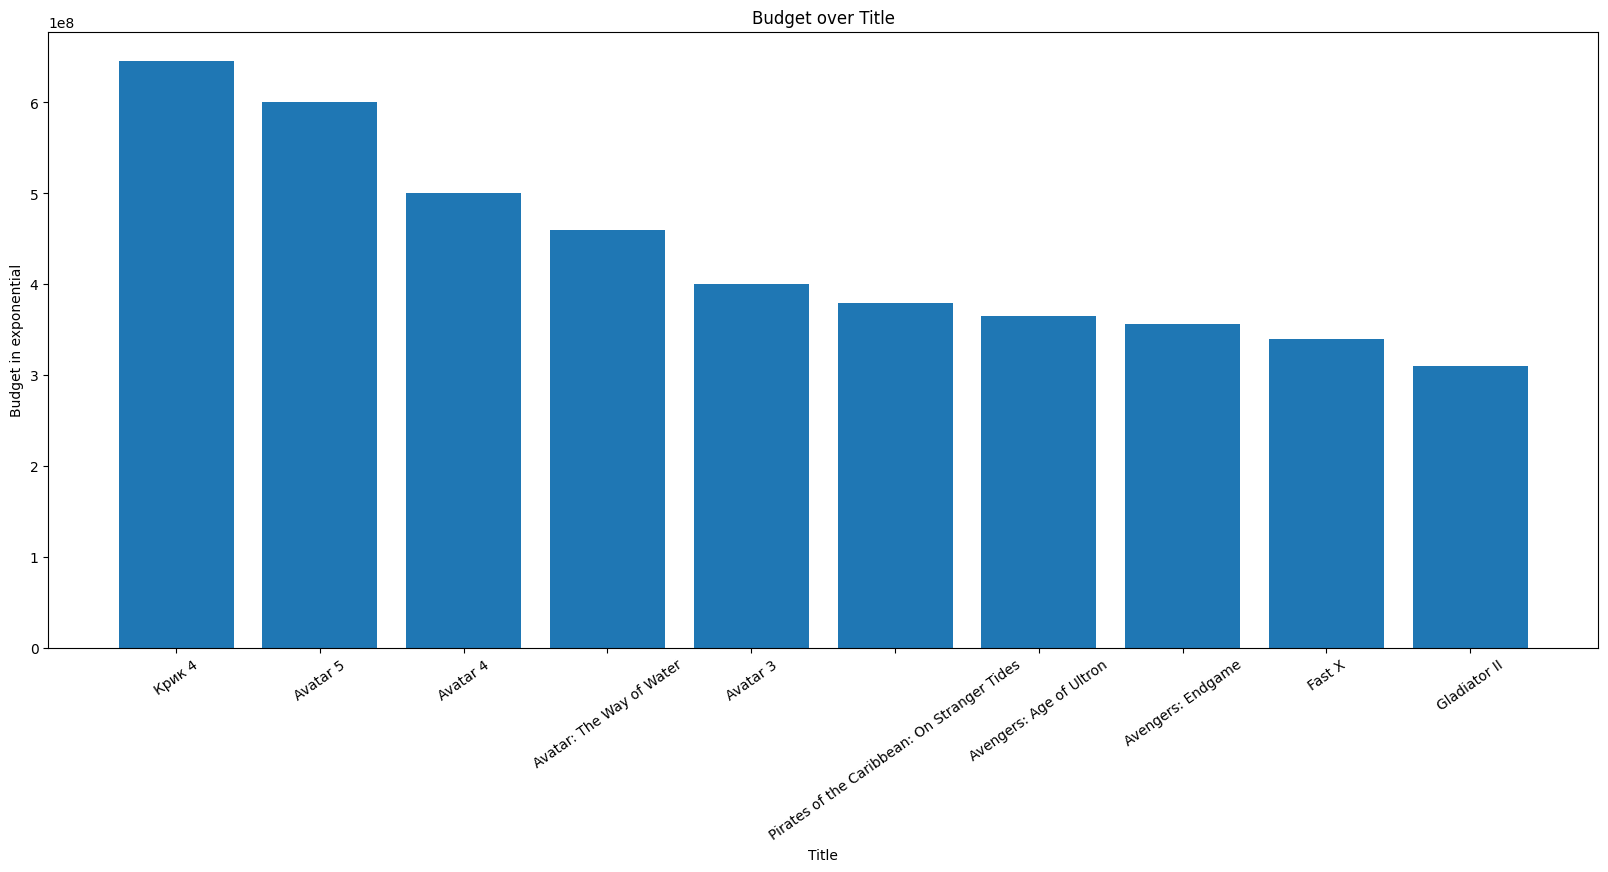

In [81]:
plt.figure(figsize=(20, 8))
plt.bar(budget_title.title, budget_title.budget)
plt.xticks(rotation=35)
plt.xlabel('Title')
plt.ylabel('Budget in exponential')
plt.title('Budget over Title')

In [82]:
title_runtime = df[['title', 'runtime', 'revenue']].sort_values(by='runtime', ascending=False).head(10)
title_runtime

,title,runtime,revenue
143582,Modern Times Forever,14400.0,0.0
504671,Svalbard minutt for minutt,13319.0,0.0
159980,Cinématon,12480.0,0.0
115868,Beijing 2003,9000.0,0.0
509429,Untitled #125 (Hickory),7200.0,0.0
223259,Matrjoschka,5700.0,0.0
79182,The Cure For Insomnia,5220.0,0.0
241416,#ALLMYMOVIES,4320.0,0.0
120356,Giant 600 Cartoon Collection,3720.0,0.0
178974,The Longest Most Meaningless Movie in the World,2880.0,0.0


In [83]:
df[df.index == 143582]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes
143582,251800,Modern Times Forever,7.0,2.0,Released,2011-03-23,0.0,14400.0,0.0,tt2659636,...,"Denmark, Finland, Vietnam",Dansk,NaN,"Rasmus Nielsen, Jakob Fenger, Bjornstjerne Reu...",NaN,NaN,NaN,NaN,6.3,101.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Modern Times Forever'),
  Text(1, 0, 'Svalbard minutt for minutt'),
  Text(2, 0, 'Cinématon'),
  Text(3, 0, 'Beijing 2003'),
  Text(4, 0, 'Untitled #125 (Hickory)'),
  Text(5, 0, 'Matrjoschka'),
  Text(6, 0, 'The Cure For Insomnia'),
  Text(7, 0, '#ALLMYMOVIES'),
  Text(8, 0, 'Giant 600 Cartoon Collection'),
  Text(9, 0, 'The Longest Most Meaningless Movie in the World')])

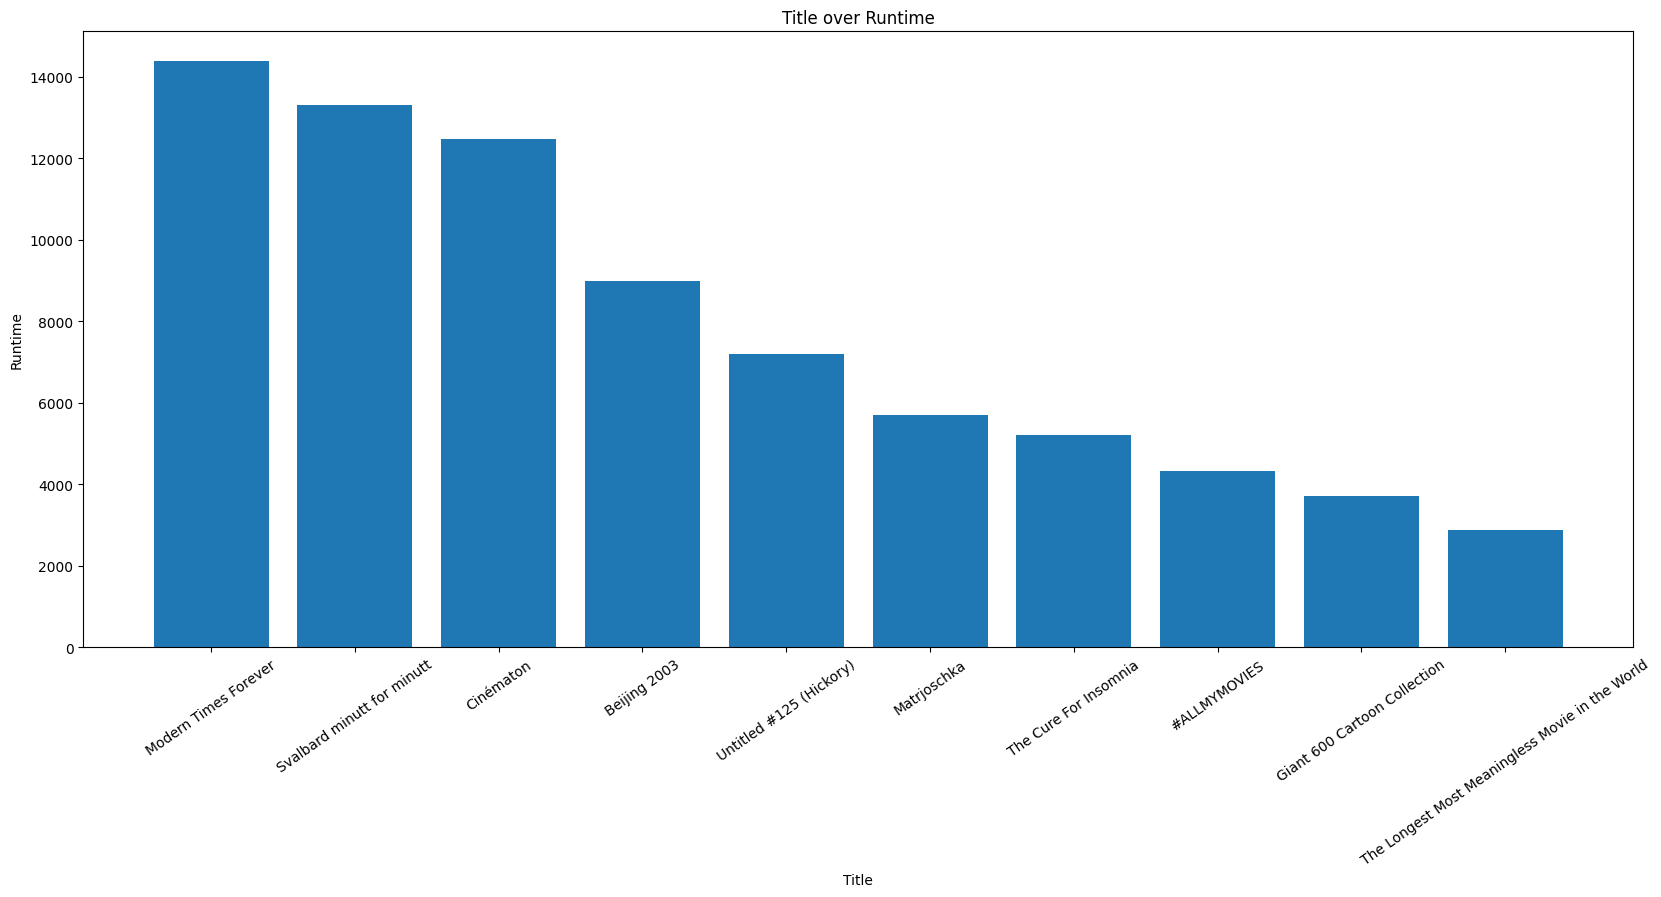

In [84]:
plt.figure(figsize=(20, 8))
plt.bar(title_runtime.title, title_runtime.runtime)
plt.title('Title over Runtime')
plt.xlabel('Title')
plt.ylabel('Runtime')
plt.xticks(rotation=35)

In [85]:
most_languages = df.original_language.value_counts()
most_languages.head(10)

,count
original_language,
en,485627
fr,60912
es,54971
de,46324
ja,42005
pt,29794
zh,25533
ru,23068
it,22374


Text(0.5, 1.0, 'Movies count over Languages')

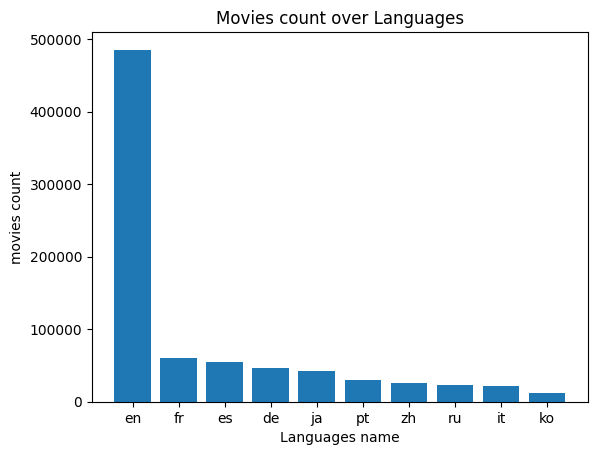

In [86]:
plt.bar(most_languages.index[:10], most_languages.values[:10])
plt.xlabel('Languages name')
plt.ylabel('movies count')
plt.title('Movies count over Languages')

In [87]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'director_of_photography', 'writers', 'producers',
       'music_composer', 'imdb_rating', 'imdb_votes'],
      dtype='object')

In [88]:
most_voted = df[['title', 'vote_count']].sort_values(by='vote_count', ascending=False)
most_voted.head(10)

,title,vote_count
16346,Inception,36070.0
96740,Interstellar,34826.0
116,The Dark Knight,32300.0
12058,Avatar,31106.0
178665,Deadpool,30363.0
14443,The Avengers,30318.0
183549,Avengers: Infinity War,29198.0
428,Fight Club,28880.0
78058,Guardians of the Galaxy,27660.0
550,Pulp Fiction,27443.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Inception'),
  Text(1, 0, 'Interstellar'),
  Text(2, 0, 'The Dark Knight'),
  Text(3, 0, 'Avatar'),
  Text(4, 0, 'Deadpool'),
  Text(5, 0, 'The Avengers'),
  Text(6, 0, 'Avengers: Infinity War'),
  Text(7, 0, 'Fight Club'),
  Text(8, 0, 'Guardians of the Galaxy'),
  Text(9, 0, 'Pulp Fiction')])

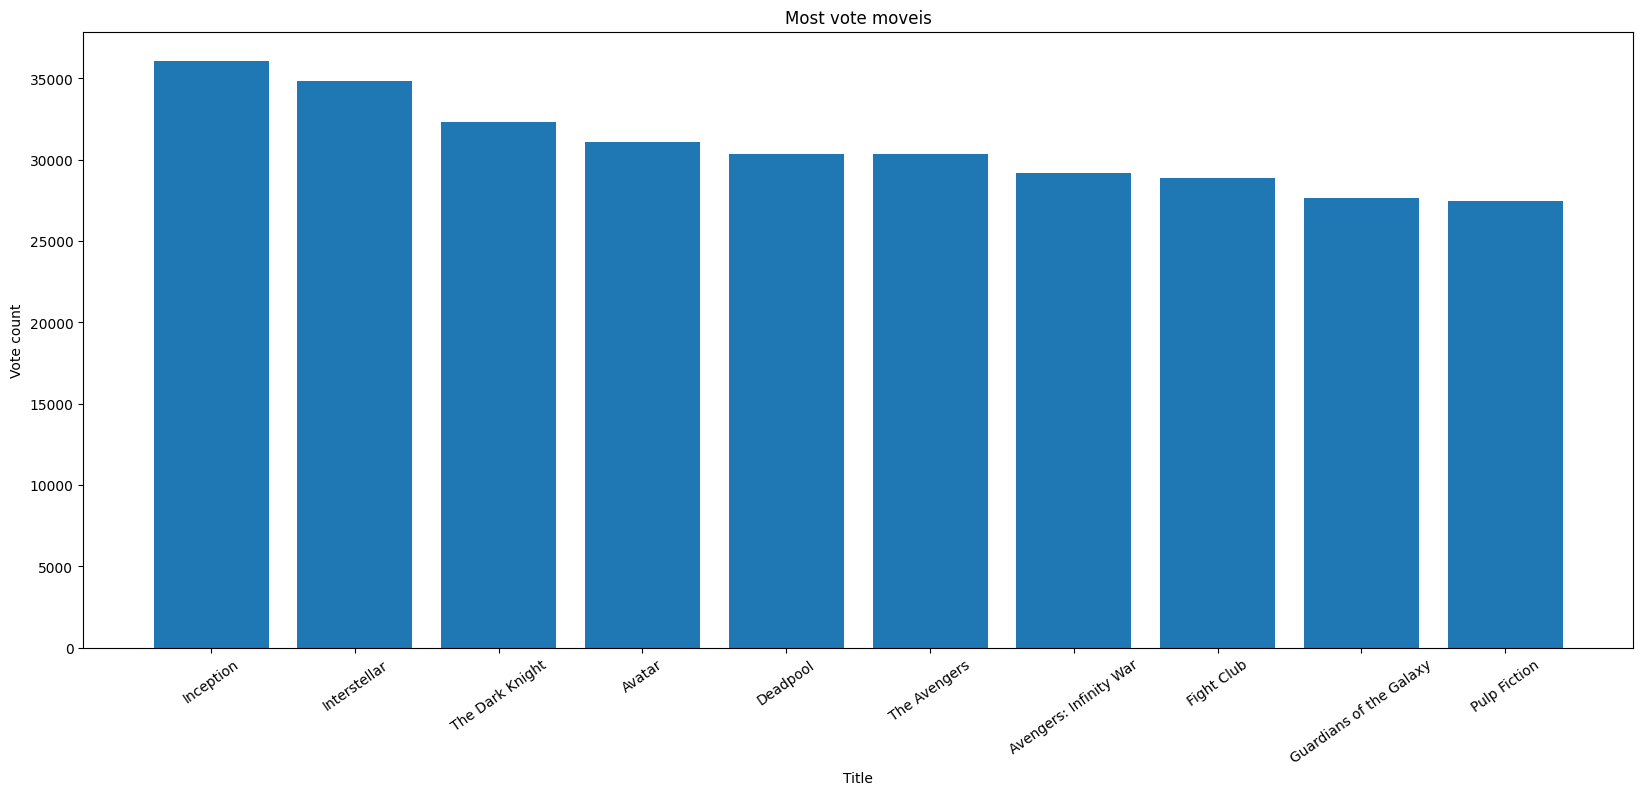

In [89]:
plt.figure(figsize=(20, 8))
plt.bar(most_voted.title[:10], most_voted.vote_count[:10])
plt.title('Most vote moveis')
plt.xlabel('Title')
plt.ylabel('Vote count')
plt.xticks(rotation=35)

In [90]:
popularity = df[['title', 'popularity']].sort_values(by='popularity', ascending=False)
popularity.head(10)

,title,popularity
372673,Deadpool & Wolverine,22001.069
402170,Bad Boys: Ride or Die,4305.932
543377,A Quiet Place: Day One,3723.597
726777,Inside Out 2,3484.012
361046,Despicable Me 4,2830.903
571675,The Ministry of Ungentlemanly Warfare,1715.876
533400,The Garfield Movie,1342.108
462285,Kingdom of the Planet of the Apes,1135.351
863648,Justice League: Crisis on Infinite Earths Part...,1077.158
757282,The Convert,1072.712


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Deadpool & Wolverine'),
  Text(1, 0, 'Bad Boys: Ride or Die'),
  Text(2, 0, 'A Quiet Place: Day One'),
  Text(3, 0, 'Inside Out 2'),
  Text(4, 0, 'Despicable Me 4'),
  Text(5, 0, 'The Ministry of Ungentlemanly Warfare'),
  Text(6, 0, 'The Garfield Movie'),
  Text(7, 0, 'Kingdom of the Planet of the Apes'),
  Text(8, 0, 'Justice League: Crisis on Infinite Earths Part Three'),
  Text(9, 0, 'The Convert')])

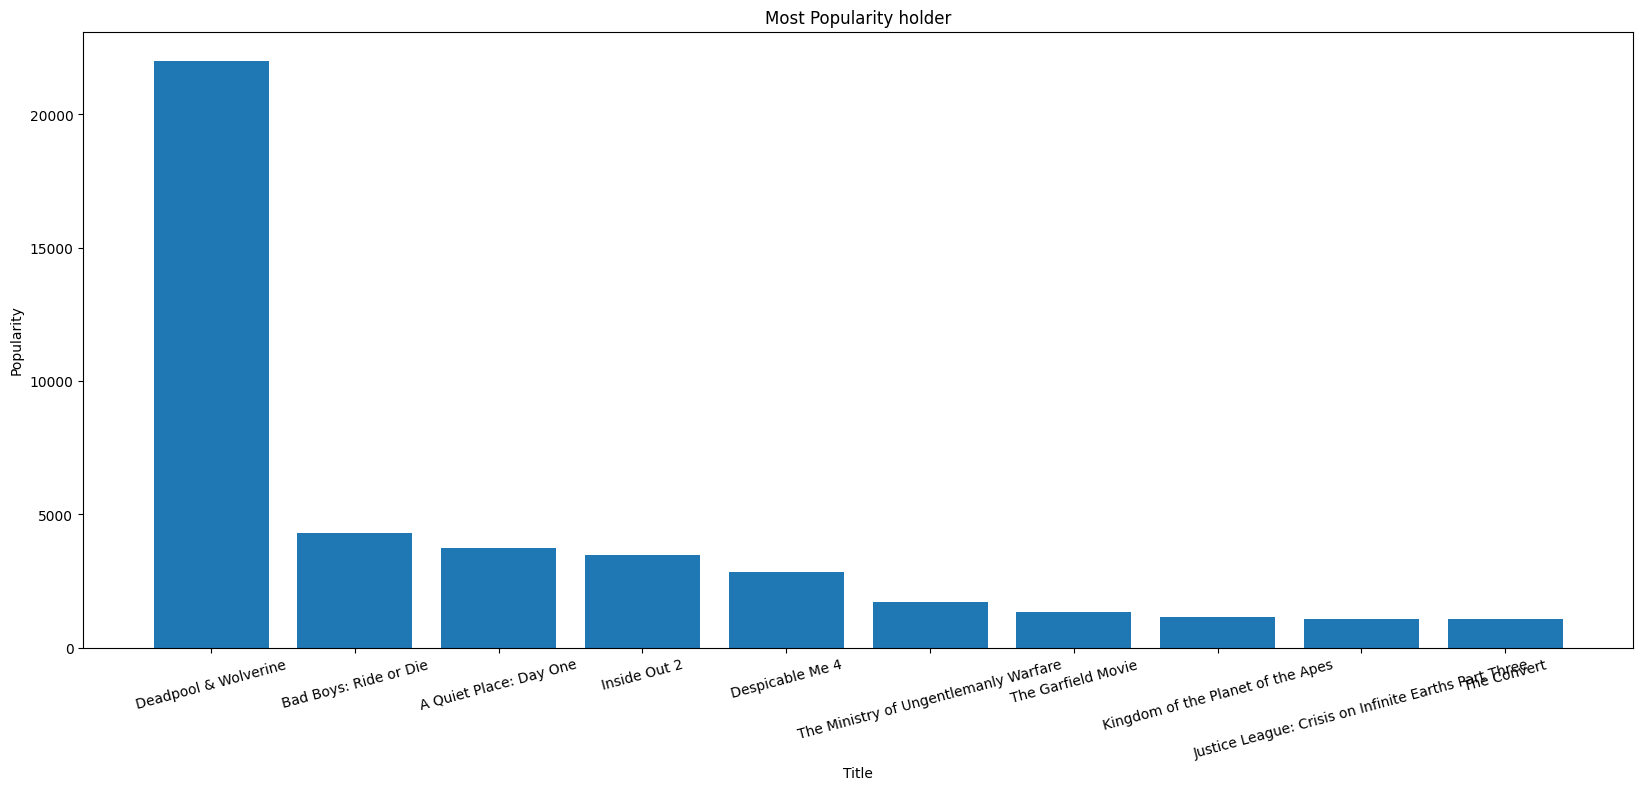

In [91]:
plt.figure(figsize=(20, 8))
plt.bar(popularity.title[:10], popularity.popularity[:10])
plt.title('Most Popularity holder')
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.xticks(rotation=15)

In [92]:
df.genres.unique()

array(['Drama, Comedy, Romance, Crime', 'Comedy, Drama, Romance',
       'Comedy', ..., 'Comedy, Western, Adventure, Action, Animation',
       'Fantasy, War, Action, Adventure, Drama', 'War, Mystery, Romance'],
      dtype=object)

In [93]:
common_genres = df.genres.unique()
common_genres[:20]

array(['Drama, Comedy, Romance, Crime', 'Comedy, Drama, Romance',
       'Comedy', 'Action, Crime, Thriller', 'Documentary', 'Drama',
       'Adventure, Action, Science Fiction', 'Animation, Family',
       'Mystery, Drama', 'Drama, Crime', 'Horror, Thriller, Mystery',
       'Adventure, Fantasy, Action, Thriller, Science Fiction',
       'Drama, Science Fiction', 'Drama, Romance',
       'Adventure, Fantasy, Action', 'Action, Crime', 'Drama, War',
       'Drama, Music, Romance', 'Western', 'Animation, Comedy, Family'],
      dtype=object)

In [94]:
common_genres_df = pd.DataFrame(common_genres, columns=['Genres'])
common_genres_df['Genres'] = common_genres_df['Genres'].str.split(', ')
common_genres_df = common_genres_df.explode('Genres')
common_genres_df

,Genres
0,Drama
0,Comedy
0,Romance
0,Crime
1,Comedy
...,...
13831,Adventure
13831,Drama
13832,War
13832,Mystery


In [95]:
cf_count = common_genres_df.value_counts().sort_values(ascending=False)
cf_count = cf_count.reset_index()
cf_count.columns = ['genre', 'count']
cf_count

,genre,count
0,Drama,5860
1,Comedy,4840
2,Action,4394
3,Adventure,3918
4,Fantasy,3604
5,Thriller,3379
6,Horror,3041
7,Science Fiction,2963
8,Romance,2955
9,Animation,2908


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Fantasy'),
  Text(5, 0, 'Thriller'),
  Text(6, 0, 'Horror'),
  Text(7, 0, 'Science Fiction'),
  Text(8, 0, 'Romance'),
  Text(9, 0, 'Animation'),
  Text(10, 0, 'Mystery'),
  Text(11, 0, 'Family'),
  Text(12, 0, 'Crime'),
  Text(13, 0, 'TV Movie'),
  Text(14, 0, 'Music'),
  Text(15, 0, 'History'),
  Text(16, 0, 'Documentary'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Western')])

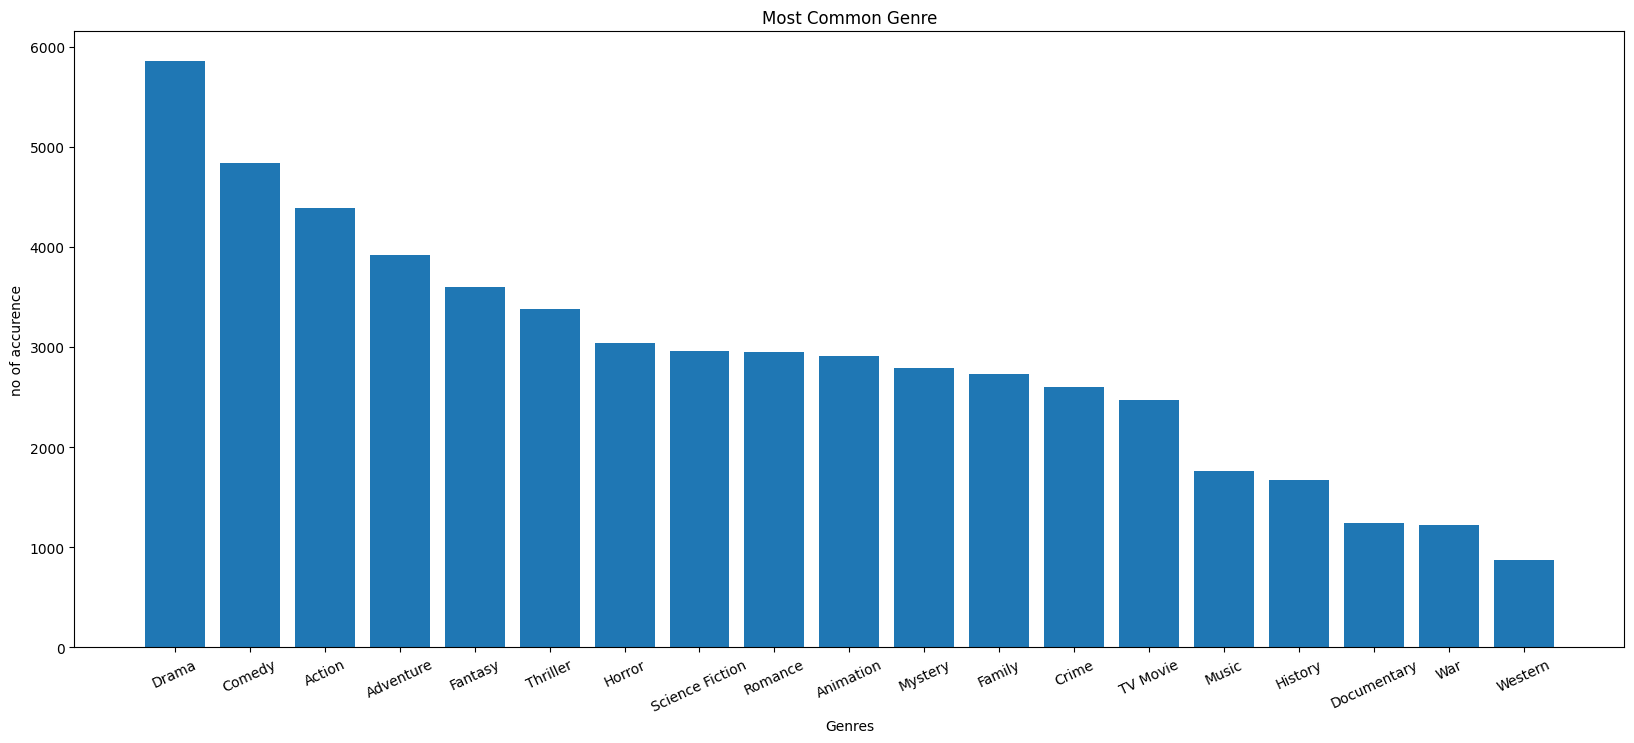

In [96]:
plt.figure(figsize=(20, 8))
plt.bar(cf_count['genre'], cf_count['count'])
plt.title('Most Common Genre')
plt.xlabel('Genres')
plt.ylabel('no of accurence')
plt.xticks(rotation=25)

In [97]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'director_of_photography', 'writers', 'producers',
       'music_composer', 'imdb_rating', 'imdb_votes'],
      dtype='object')

In [98]:
popularity_rating = df[['title', 'original_language', 'popularity', 'imdb_rating']].sort_values(by='popularity', ascending=False)
popularity_rating.head(10)

,title,original_language,popularity,imdb_rating
372673,Deadpool & Wolverine,en,22001.069,8.2
402170,Bad Boys: Ride or Die,en,4305.932,6.8
543377,A Quiet Place: Day One,en,3723.597,6.5
726777,Inside Out 2,en,3484.012,7.8
361046,Despicable Me 4,en,2830.903,6.3
571675,The Ministry of Ungentlemanly Warfare,en,1715.876,6.8
533400,The Garfield Movie,en,1342.108,5.7
462285,Kingdom of the Planet of the Apes,en,1135.351,7.0
863648,Justice League: Crisis on Infinite Earths Part...,en,1077.158,6.0
757282,The Convert,en,1072.712,6.4


<ipython-input-99-66a109655477>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(popularity_rating['title'].head(10), rotation=25)


Text(0, 0.5, 'IMDB rating')

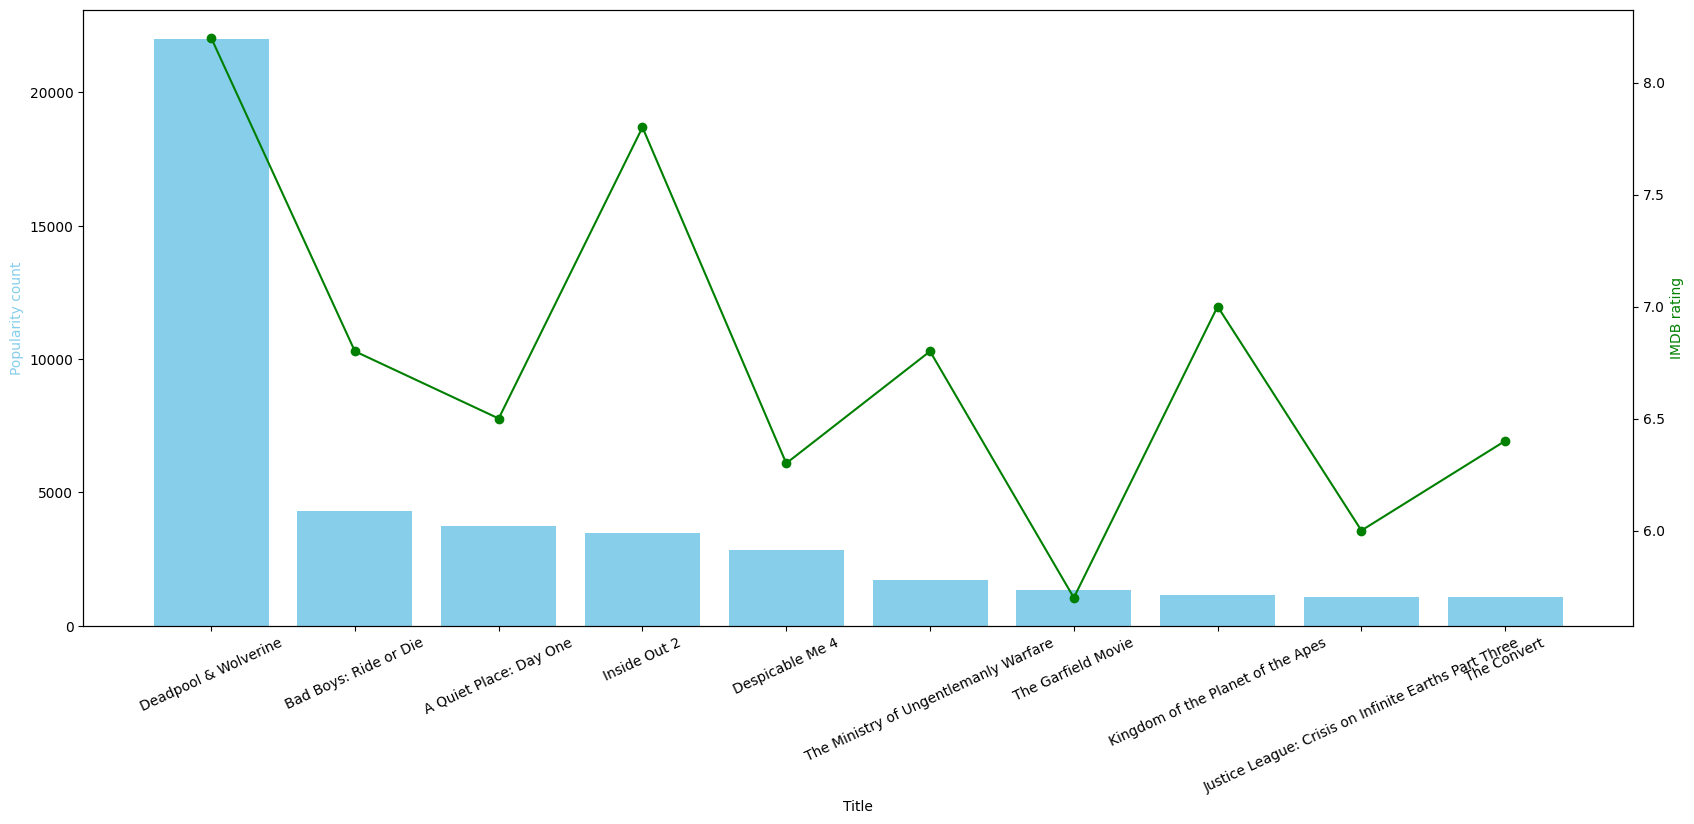

In [99]:
fig, ax1 = plt.subplots(figsize=(20, 8))

ax1.bar(popularity_rating['title'].head(10), popularity_rating['popularity'].head(10), color='skyblue', label='Popularity')
ax1.set_xlabel('Title')
ax1.set_ylabel('Popularity count', color='skyblue')
ax1.set_xticklabels(popularity_rating['title'].head(10), rotation=25)

ax2 = ax1.twinx()
ax2.plot(popularity_rating['title'].head(10), popularity_rating['imdb_rating'].head(10), label='imdb rating', marker='o', color='green')
ax2.set_ylabel('IMDB rating', color='green')

In [100]:
compare_rev_bugd = df.loc[:, ['title', 'revenue', 'budget']]
compare_rev_bugd.head(10)

,title,revenue,budget
0,Ariel,0.0,0.0
1,Shadows in Paradise,0.0,0.0
2,Four Rooms,4257354.0,4000000.0
3,Judgment Night,12136938.0,21000000.0
4,Life in Loops (A Megacities RMX),0.0,42000.0
5,Sunday in August,0.0,0.0
6,Star Wars,775398007.0,11000000.0
7,Finding Nemo,940335536.0,94000000.0
8,Forrest Gump,677387716.0,55000000.0
9,American Beauty,356296601.0,15000000.0


In [101]:
top_10_compare_rev_bugd = compare_rev_bugd.sort_values(by='revenue', ascending=False)
top_10_compare_rev_bugd.head(10)

,title,revenue,budget
916188,TikTok Rizz Party,3.000000e+09,250000000.0
12058,Avatar,2.923706e+09,237000000.0
183547,Avengers: Endgame,2.799439e+09,356000000.0
53918,Avatar: The Way of Water,2.320250e+09,460000000.0
471,Titanic,2.264162e+09,200000000.0
89041,Star Wars: The Force Awakens,2.068224e+09,245000000.0
183549,Avengers: Infinity War,2.052415e+09,300000000.0
448037,Spider-Man: No Way Home,1.921847e+09,200000000.0
86544,Jurassic World,1.671537e+09,150000000.0
283049,The Lion King,1.663000e+09,260000000.0


<ipython-input-102-76bd9e4a8662>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_10_compare_rev_bugd['title'].head(10), rotation=25)


Text(0, 0.5, 'Revenue')

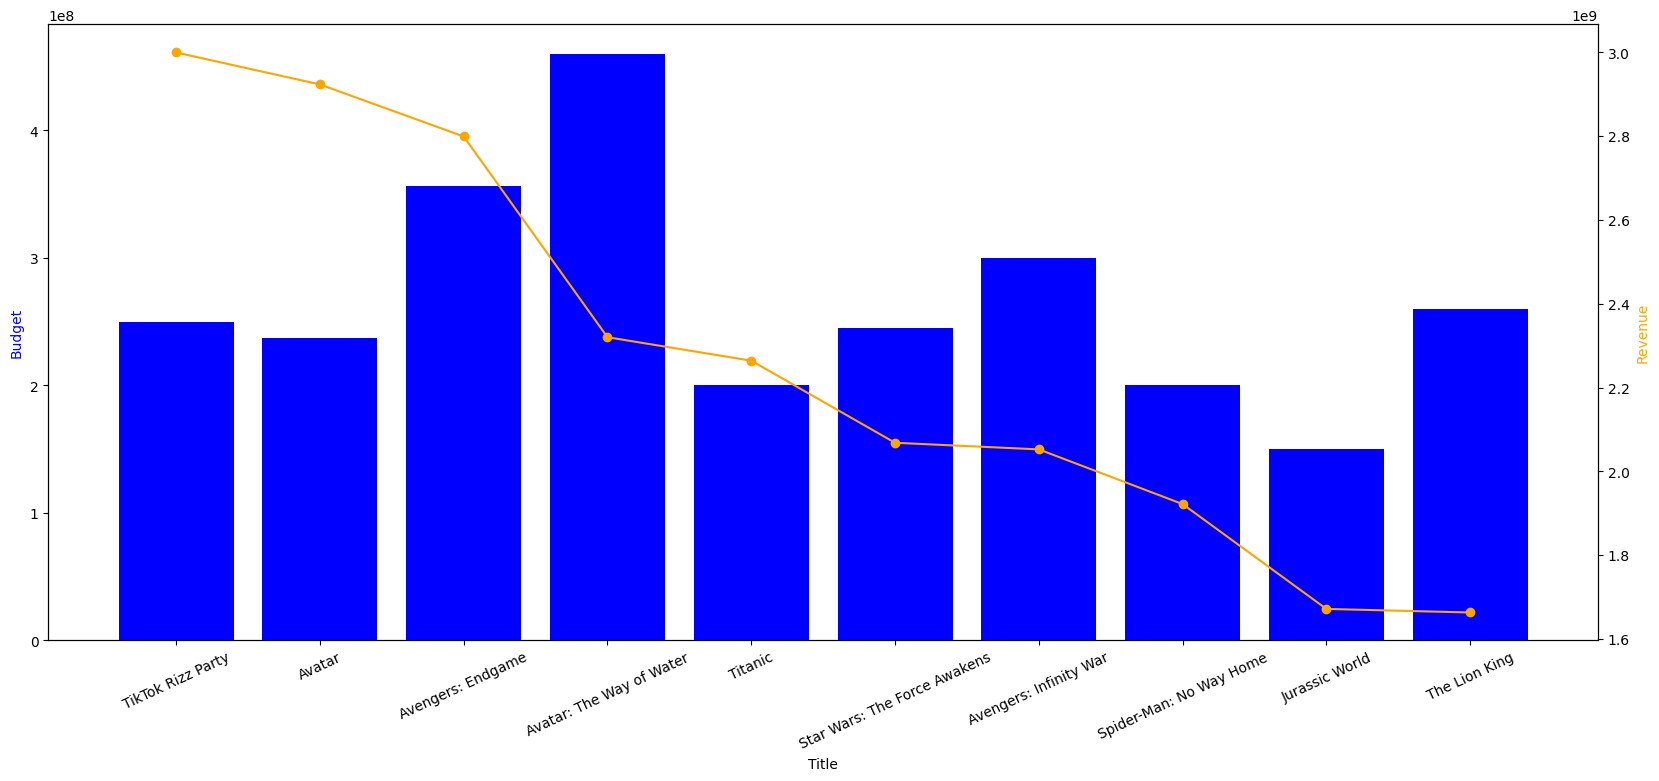

In [102]:
fig, ax1 = plt.subplots(figsize=(20, 8))

ax1.bar(top_10_compare_rev_bugd['title'].head(10), top_10_compare_rev_bugd['budget'].head(10), label='budget', color='blue')
ax1.set_xlabel('Title')
ax1.set_ylabel('Budget', color='blue')
ax1.set_xticklabels(top_10_compare_rev_bugd['title'].head(10), rotation=25)

ax2 = ax1.twinx()
ax2.plot(top_10_compare_rev_bugd['title'].head(10), top_10_compare_rev_bugd['revenue'].head(10), marker='o', color='orange', label='revenue')
ax2.set_ylabel('Revenue', color='orange')